In this work I'll try to classify the bloggers as a part of a test task.

## 1) Popularity
As for me, this category is the most important. It represents bloggers value for publicity in the long term or in short term. I took it's value like avarage between number of comments, MEIBI and MEIBIX.

In [37]:
import pandas as pd
import numpy as np

authors=pd.read_csv('autors.csv')
posts_prev=pd.read_csv('posts.csv')
posts=posts_prev.rename(columns={"Blogger's ID":'Author ID', "Blogger's Name": 'Name'})
joined=authors.merge(posts, on=['Author ID','Name'], how='outer')
%matplotlib inline

The ranking will be done in the next algorithm:<br>
1) Set popularity points to each post depands on its MEIBI, MEIBIX and the number of retrieved comments;<br>
2) Set popularity points to each blogger as an avarage number of his/her post popularity points;<br>
3) Sort bloggers by pop. points by descending order;<br>
4) For each of them set rank, where rank 1 - 20% of the bests, rank 2 - next 20%, ... , rank 5 - less popular 20%.

1    22
5    22
2    21
3    21
4    21
Name: Rank, dtype: int64


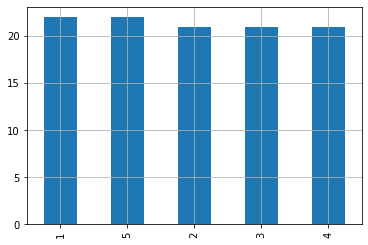

In [38]:
pops=joined.copy()

pops['Post popularity']=round(pops[['MEIBI', 'MEIBIX', 'Number of retrieved comments']].mean(axis=1),1)
df=round(pops[['Author ID','Post popularity']].groupby(['Author ID']).mean(),2)
df=df.rename(columns={'Post popularity':'Author popularity'})

df['Rank']=pd.qcut(df['Author popularity'], q=[0,.20,.40,.60,.80,1], labels=[5,4,3,2,1])
pops=pops.merge(df, on=['Author ID'], how='outer')

df['Rank'].value_counts().plot(kind='bar', grid=True)
print(df['Rank'].value_counts())

As we can see, the number of bloggers in each rank is almost equal.<br><br>
## 2) Topic 
In this category I will try to divide bloggers by topic. Topics will be got from keywords in titles.


In [39]:
topics=joined.copy()

topic_list=topics[['Name','Title']]
frames=[]

for name in topic_list['Name'].unique():
    frames.append({name: topic_list[topic_list['Name']==name]['Title']})
frames[1]

{'Michael Arrington': 1821    NYTimes Request Correction/Removal Of Our Post...
 1822            Topeka? Come On Google, You Can Do Better
 1823    Introducing The Do-It-Yourself CrunchPad Kit [...
 1824                      Exclusive: Google To Go Nuclear
 1825    Former MySpace Exec Teams With Yahoo Rock Star...
                               ...                        
 6719                               Google Reviews Profile
 6720                                     BackPack Profile
 6721                                       Plazes Profile
 6722                                   FeedLounge Profile
 6723                              Technorati Beta Profile
 Name: Title, Length: 4903, dtype: object}

Seeing at some bloggers topics, I noticed that are pretty similar. To get some topics based on post content, the artificial neural networks should be used.

## 3) Involvement
This category shows avarage the number of comments bloggers get. Like with popularity, all bloggers will be divided to ranks.  

(35.0, 3179.0]    6536
(-0.001, 18.0]    6510
(18.0, 35.0]      6418
Name: Number of retrieved comments, dtype: int64


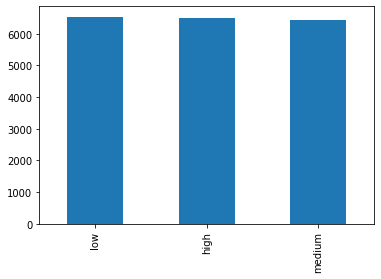

In [40]:
involvement=joined.copy()

involvement['Involvement']=pd.qcut(involvement['Number of retrieved comments']
                                        .sort_values(ascending=False), q=[0,.33,.66,1], labels=['high','medium','low'])
print(pd.qcut(involvement['Number of retrieved comments']
                                        .sort_values(ascending=False), q=[0,.33,.66,1]).value_counts())
involvement['Involvement'].value_counts().plot(kind='bar')

## 4) Infomativeness
This category shows how informative the blogger's text is in relation to the written text. The more a blogger uses non-noise words, the more informative he is and, on the contrary, a large amount of "water" lowers this rating.

In [52]:
informativeness=joined.copy()

informativeness['Informativeness']=round(informativeness['Average Number Of Words In Posts (without stopwords)']/informativeness['Average Number Of Words In Posts'], 2)
informativeness=round(informativeness[['Author ID','Name' ,'Informativeness']].groupby(['Author ID', 'Name']).mean(),2)

Here we can see the rating for informativeness, where the closer point is to 1 the better it is. The value of 0.5 shows that each 2nd word is informativeless.

In [55]:
informativeness.sort_values(['Informativeness'], ascending=False)
joined

,Author ID,Name,MEIBI,MEIBIX,Average Number Of Words In Posts (without stopwords),Average Number Of Words In Posts,Post ID,Title,Number of comments,Content,Date,Number of retrieved inlinks,Number of retrieved comments
0,1,Jason Kincaid,43,43,4.257910,5.858018,1,We Just Tested Twitter&#8217;s @anywhere Platf...,14,"During his keynote at SXSW last month, Twitter...",2010-04-01,0,14
1,1,Jason Kincaid,43,43,4.257910,5.858018,2,Facebook To Launch &#8216;Relationships&#8217;...,30,Later this month Facebook is holding its f8 co...,2010-04-01,0,30
2,1,Jason Kincaid,43,43,4.257910,5.858018,6,"Blippy Does An End Run, Harnesses Gmail OAuth ...",13,"Early this year, Blippy, the highly controvers...",2010-04-01,1,13
3,1,Jason Kincaid,43,43,4.257910,5.858018,9,Behind The Scenes Of YouTube&#8217;s ASCII Prank,8,"Today, millions of people around the world wer...",2010-04-01,2,8
4,1,Jason Kincaid,43,43,4.257910,5.858018,14,RethinkDB Raises $1.2 Million For Its Database...,3,"RethinkDB, the startup that&#8217;s looking to...",2010-04-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19459,107,Fred Oliveira,1,1,4.278449,5.757716,19258,Netvibes &#8211; Personal homepage,46,"Netvibes, a project started in France by Flora...",2005-09-16,12,20
19460,107,Fred Oliveira,1,1,4.278449,5.757716,19259,Editorial: On Mash-ups,17,"Mash-ups, or the use of distinctive services f...",2005-09-16,0,17
19461,107,Fred Oliveira,1,1,4.278449,5.757716,19322,Profile &#8211; VitalSource,14,Every once in a while I am surprised by some o...,2005-08-17,0,14
19462,107,Fred Oliveira,1,1,4.278449,5.757716,19348,Profile &#8211; Chalk,7,"In a short but interesting announcement, Chalk...",2005-08-05,2,1


## 5) Responsiveness
This category shows the ratio of the received comments to the total number. 0.5 was taken as the reference value, which shows that the blogger responds to every comment received. A value greater than this number indicates that the blogger leaves more comments than everyone else together, and less that some of the comments from the outside are ignored.

In [66]:
responsiveness=joined.copy()
bloggers=authors.copy()

responsiveness['Responsiveness']=round((responsiveness['Number of retrieved comments']/responsiveness['Number of comments']), 2)
responsiveness.loc[np.isinf(responsiveness['Responsiveness'])]=0

def set_mark(x):
    if x>0.5:
        return 'too much'
    elif x<0.5:
        return 'too little'
    else:
        return 'perfect'

responsiveness=round(responsiveness[['Author ID','Name' ,'Responsiveness']].groupby(['Author ID', 'Name']).mean(),2)
responsiveness

,,Responsiveness
Author ID,Name,
0,0,0.00
1,Jason Kincaid,1.31
2,Michael Arrington,1.70
3,Erick Schonfeld,0.75
4,John Biggs,1.20
...,...,...
103,Vivian Wu,0.88
104,Wil Schroter,0.79
105,Neil Kjeldsen,0.63


## Usage
In this work I highlighted blogger categories. These categories are usefull for few groups: the admins of the social network, potential advertisers, readers and the blogger himself.

<table border="1">
   <caption>Categories and their uses</caption>
   <tr>
    <th>Category</th>
    <th>Audithory</th>
    <th>Use</th>
   </tr>
   <tr><td>Popularity</td><td>SN admins, advertisers, readers, bloggers</td><td><b>SN admins</b>: well-known bloggers who promote their blog attract, thereby, new people to the social network, thus, the social network is interested in encouraging such bloggers.<br>
       <b>Advertisers:</b> the more popular a blogger is, the more reach he can provide, and the more authority he has among his subscribers, the more effective the advertising.<br>
       <b>Readers:</b> the most popular bloggers most often give rise to trends that later go viral. <br>
       <b>Bloggers:</b> other bloggers can use the example of the top ones to improve themselves and their rating</td></tr>
   <tr><td>Topic</td><td>Advertisers, readers</td><td><b>Advertisers:</b> the closer the blogger's topic is, the more relevant and effective the advertising will be.<br>
       <b>Readers:</b> readers could check what topics are the most popular at the moment and keep abreast of the latest news<br></td></tr>
   <tr><td>Involvement</td><td>Advertisers</td><td>The more engagement the audience, the more lively and active it is, which increases the likelihood that they will become potential buyers.</td></tr>
   <tr><td>Informativeness</td><td>Readers</td><td>The more informative a blogger is, the more valuable the information he gives.</td></tr>
   <tr><td>Responsiveness</td><td>Advertisers, readers</td><td><b>Advertisers:</b> The more a blogger interacts with the audience, the more authority he has among subscribers and the more likely that people will listen to the advertisements he will voice.<br>
       <b>Readers:</b> by interacting with the audience, the blogger shows that his followers are important to him not only by numbers, but also by their opinions, which increases trust in him and in what he says.</td></tr>
  </table>